### Import Libraries

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



TensorFlow 2.x selected.
2.1.0


In [2]:
# Test GPU
from tensorflow.python.client import device_lib
# device_lib.list_local_devices() #sometimes you get Tesla T4
print(tf.test.gpu_device_name())


/device:GPU:0


### Load data

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Explore the data

train data shape:  (60000, 28, 28)
train labels shape:  (60000,)


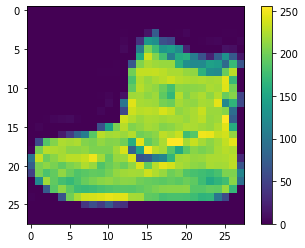

processed train data shape:  (60000, 28, 28)


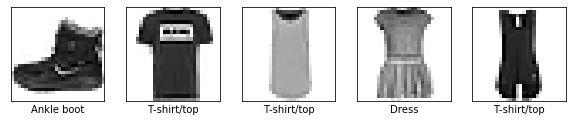

processed train data shape:  (60000, 28, 28, 1)


In [4]:
print("train data shape: ", train_images.shape)
print("train labels shape: ", train_labels.shape)

# plot data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# preprocess the data: Convert to grascale image
train_images = train_images / 255.0
test_images = test_images / 255.0

print("processed train data shape: ", train_images.shape)

# Corresponding object names to data labels 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# expand dimension on train data (batch_samples, row, cols, channels)
# (60000, 28, 28) => (60000, 28, 28, 1) grayscale image has 1 channel

train_images = np.expand_dims(train_images, axis=3)  
test_images = np.expand_dims(test_images, axis=3)

print("processed train data shape: ", train_images.shape)

### Build the model

In [102]:
CNN = 0
if CNN == 0:
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28, 28,1)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10)
  ])

else:
# CNN model
# keras.layers.Conv1D(filters, kernel_size, strides=1, padding='valid', dilation_rate=1, 
#                      activation=None, use_bias=True)
# keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')

  model = keras.Sequential([
      keras.layers.Conv2D(32, 2, padding='same', activation='relu', input_shape=(28, 28,1)),
      keras.layers.Dropout(0.3),
      keras.layers.Conv2D(32, 2, padding='same', activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Conv2D(64, 2, padding='same', activation='relu'),
      keras.layers.MaxPooling2D(),
      keras.layers.Dropout(0.5),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(10)
  ])

model.summary()  

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Define Loss, optimizer and accuracy

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Create sample batch using ImageDataGenerator
ImageDataGenerator can be used to augment the data. 
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [0]:
# define hyperparameters
bs = 32
steps_per_epoch=len(train_images)//bs
epochs = 10

datagen = ImageDataGenerator()
train_gen = datagen.flow(train_images, train_labels, shuffle=True, batch_size=bs, seed = 10)

### Train the model

In [105]:
history = model.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=epochs)

  ...
    to  
  ['...']
Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4978 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3757 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3368 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8929
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2816 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2681 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2516 - accuracy: 0.9059
Epoch 10/10
1875/1875 [=============

### Evaluate accuracy

In [106]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3820 - accuracy: 0.8639

Test accuracy: 0.8639


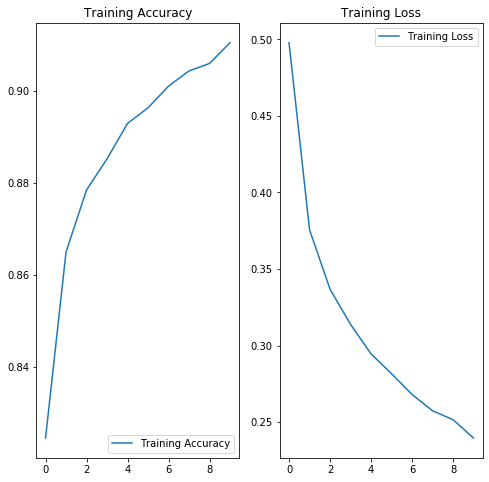

In [107]:
acc = history.history['accuracy']

loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()